In [2]:
import pandas as pd
import numpy as np
import copy
import random
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/nayak_pratheek17/Desktop/College Material/ML/MachineLearningLab/A3.csv')

In [4]:
df

,X1,X2
0,5.9,3.2
1,4.6,2.9
2,6.2,2.8
3,4.7,3.2
4,5.5,4.2
5,5.0,3.0
6,4.9,3.1
7,6.7,3.1
8,5.1,3.8
9,6.0,3.0


In [5]:
X = df.to_numpy()
X

array([[5.9, 3.2],
       [4.6, 2.9],
       [6.2, 2.8],
       [4.7, 3.2],
       [5.5, 4.2],
       [5. , 3. ],
       [4.9, 3.1],
       [6.7, 3.1],
       [5.1, 3.8],
       [6. , 3. ]])

In [6]:
k = 3
oldCentroid = [[0, 0]] * k
centroid = [[6.2,3.2],[6.6,3.7],[6.5,3.0]]

oldCentroid = np.array(oldCentroid)
centroid = np.array(centroid)

In [7]:
centroid

array([[6.2, 3.2],
       [6.6, 3.7],
       [6.5, 3. ]])

In [8]:
cluster = [0] * len(X)

In [9]:
cluster

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
# distance
def dis(a, b, ax = 1):
    return LA.norm(a-b, axis = ax)

In [11]:
error = dis(centroid, oldCentroid, None)
error


12.53714481052205

In [13]:
iteration = 0
while error != 0:
    iteration += 1
    for i in range(len(X)):
        distances = dis(X[i], centroid)
        cluster[i] = np.argmin(distances)
    oldCentroid = copy.deepcopy(centroid)
    
    print("Clusters assigned after " + str(iteration) + " iterations are:")
    print(cluster)
    
    print("Old centroid")
    print(oldCentroid)
    
    for p in range(k):
        points = [X[j] for j in range(len(X)) if cluster[j] == p]
        centroid[p] = np.mean(points, axis = 0)
    print("Current Centroid")
    print(centroid)
    error = dis(centroid, oldCentroid, None)

In [14]:
print(centroid)

[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


In [15]:
print(cluster)

[2, 0, 2, 0, 1, 0, 0, 2, 1, 2]


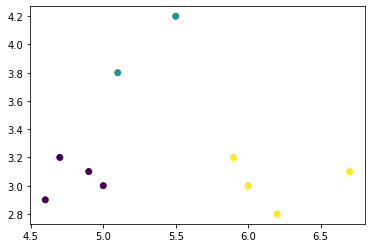

In [16]:
plt.scatter(df['X1'], df['X2'], c = cluster)